In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]
)

new = pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)

df = df_orig.append(new)

In [3]:
df.head()

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
1,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2,97.105.19.58,[16/Apr/2019:19:34:44 +0000],"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
3,97.105.19.58,[16/Apr/2019:19:34:46 +0000],"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
4,97.105.19.58,[16/Apr/2019:19:34:48 +0000],"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


In [4]:
df.timestamp = df.timestamp.str.replace(r'(\[|\+0000\])', '', regex=True)
df.timestamp = pd.to_datetime(df.timestamp.str.replace(':', ' ', 1)) 
df = df.set_index('timestamp')

In [5]:
df.head()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42,97.105.19.58,"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:42,97.105.19.58,"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:44,97.105.19.58,"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:46,97.105.19.58,"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:48,97.105.19.58,"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


In [6]:
for col in ['request_method', 'request_agent', 'destination']:
    df[col] = df[col].str.replace('"', '')

df['request_method'] = df.request_method.str.replace(r'\?page=[0-9]+', '', regex=True)

df.head()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0


In [7]:
df.tail()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-17 12:55:14,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510166,NaN,python-requests/2.21.0
2019-04-21 10:02:41,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0
2019-04-17 19:36:41,95.31.16.121,GET /api/v1/sales/HTTP/1.1,301,1005,NaN,python-requests/2.21.0
2019-04-18 19:42:41,97.105.15.120,GET /api/v1/sales/HTTP/1.1,301,2560,NaN,python-requests/2.21.0
2019-04-19 19:42:41,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,NaN,python-requests/2.21.0


In [8]:
df['size_mb'] = [n/1024/1024 for n in df['size']]

In [9]:
rm_df = pd.DataFrame(df.request_method.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'req_method', 'request_method': 'req_meth_count'})

rm_df2 = pd.DataFrame(df.request_method.value_counts(dropna=False)/df.request_method.count()).reset_index().\
                rename(index=str, columns={'index': 'req_method', 'request_method': 'req_meth_proba'})

rm_df = rm_df.merge(rm_df2)


# see those where rate < 1% 
rm_df[rm_df.req_meth_proba < .01]

,req_method,req_meth_count,req_meth_proba
3,GET / HTTP/1.1,107,0.007655
4,GET /documentation HTTP/1.1,100,0.007154
5,GET /favicon.ico HTTP/1.1,26,0.001860
6,GET /api/v1//api/v1/items HTTP/1.1,11,0.000787
7,GET /api/v1/items/api/v1/items HTTP/1.1,7,0.000501
8,GET /api/v1/items/next_page HTTP/1.1,5,0.000358
9,GET /api/v1/ HTTP/1.1,4,0.000286
10,GET /api/v1/sales/HTTP/1.1,3,0.000215
11,GET /api/v1/itemsitems HTTP/1.1,3,0.000215
12,GET /api/v1/sales/ HTTP/1.1,3,0.000215


In [10]:
rm_df.head()

,req_method,req_meth_count,req_meth_proba
0,GET /api/v1/sales HTTP/1.1,12403,0.887323
1,GET /api/v1/items HTTP/1.1,1065,0.076191
2,GET /api/v1/stores HTTP/1.1,229,0.016383
3,GET / HTTP/1.1,107,0.007655
4,GET /documentation HTTP/1.1,100,0.007154


22
                                      req_method  req_meth_count  \
12                   GET /api/v1/sales/ HTTP/1.1               3   
13                    GET /api/v1/store HTTP/1.1               3   
14                     GET /api/v1items HTTP/1.1               2   
15  GET /api/v1//api/v1/items/next_page HTTP/1.1               1   
16                          GET /api/v1 HTTP/1.1               1   
17             GET /api/v1/items&page=0 HTTP/1.1               1   
18        GET /api/v1/I_DIDNT_DO_IT!!!! HTTP/1.1               1   
19                    GET /api/v1/items/HTTP/1.1               1   
20              GET /api/v1/helloclass! HTTP/1.1               1   
21                  GET /api/V1/HiZach! HTTP/1.1               1   

    req_meth_proba  
12        0.000215  
13        0.000215  
14        0.000143  
15        0.000072  
16        0.000072  
17        0.000072  
18        0.000072  
19        0.000072  
20        0.000072  
21        0.000072  


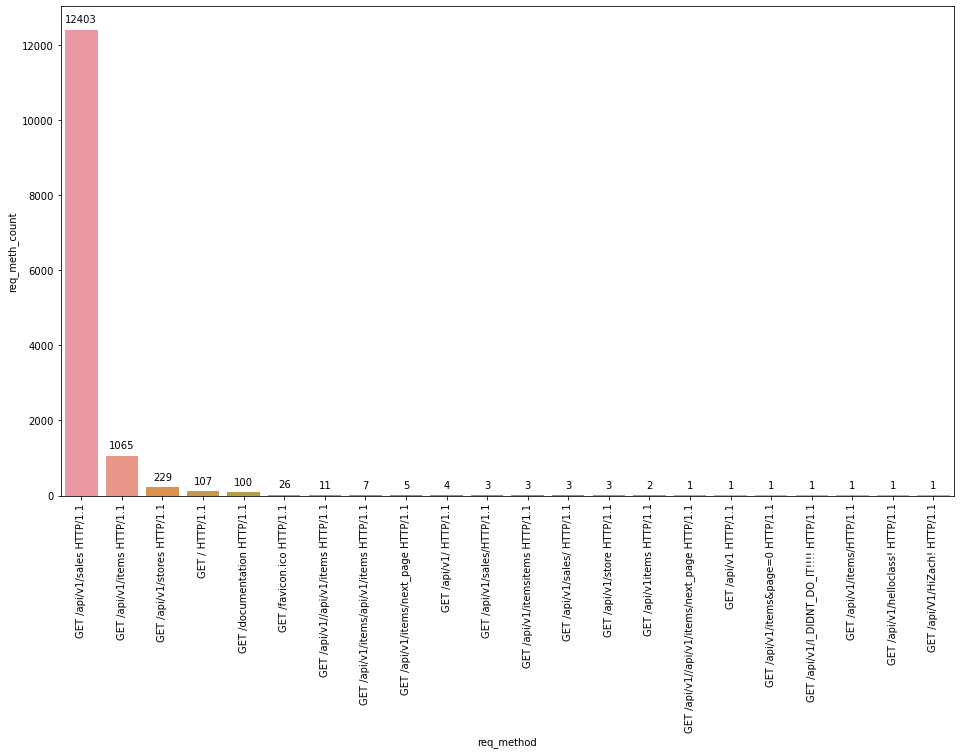

In [11]:
print(len(rm_df))

print(rm_df.tail(10))

plt.figure(figsize=(16, 9))
splot = sns.barplot(data=rm_df, x = 'req_method', y = 'req_meth_count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(rotation='vertical')

In [12]:
df.index.min(), df.index.max()

(Timestamp('2019-04-16 19:34:42'), Timestamp('2019-04-21 10:02:41'))

In [13]:
train = df.loc['2019-04-16 19:34:42':'2019-04-17 12:55:14']
train = train[['ip','request_method','status','size','destination','request_agent','size_mb']]

In [14]:
rm_df = pd.DataFrame(train.request_method.value_counts(dropna=False)/train.request_method.count()).reset_index().\
                rename(index=str, columns={'index': 'request_method', 'request_method': 'req_meth_proba'})

In [15]:
df = df.reset_index().merge(rm_df, on=['request_method'], how='left').fillna(value=0).set_index('timestamp')
df.req_meth_proba.value_counts()

0.887577    12403
0.076213     1065
0.016388      229
0.007657      107
0.007156      100
0.001861       26
0.000787       11
0.000215        9
0.000501        7
0.000072        6
0.000358        5
0.000286        4
0.000000        4
0.000143        2
Name: req_meth_proba, dtype: int64

In [16]:
df.head()

,ip,request_method,status,size,destination,request_agent,size_mb,req_meth_proba
timestamp,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.887577
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,0,python-requests/2.21.0,0.003396,0.076213
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,0,python-requests/2.21.0,0.486472,0.887577
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,0,python-requests/2.21.0,0.486377,0.887577
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,0,python-requests/2.21.0,0.488246,0.887577


In [18]:
rm_probs = train.groupby('request_method').size().div(len(df))

status_given_rm = pd.DataFrame(train.groupby(['request_method', 'status']).\
                               size().div(len(train)).\
                               div(rm_probs, 
                                   axis=0, 
                                   level='request_method').\
                               reset_index().\
                               rename(index=str, 
                                      columns={0: 'proba_status_given_rm'})
                              )

In [20]:
rm_probs.head()

request_method
GET / HTTP/1.1                        0.007655
GET /api/V1/HiZach! HTTP/1.1          0.000072
GET /api/v1 HTTP/1.1                  0.000072
GET /api/v1/ HTTP/1.1                 0.000286
GET /api/v1//api/v1/items HTTP/1.1    0.000787
dtype: float64

In [22]:
status_given_rm.tail()

,request_method,status,proba_status_given_rm
17,GET /api/v1/store HTTP/1.1,200,1.000286
18,GET /api/v1/stores HTTP/1.1,200,1.000286
19,GET /api/v1items HTTP/1.1,200,1.000286
20,GET /documentation HTTP/1.1,200,1.000286
21,GET /favicon.ico HTTP/1.1,200,1.000286


In [23]:
rm_status_count = pd.DataFrame(train.groupby(['request_method', 'status'])['ip'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'request_method': 'rm_status_count'}))


rm_status = status_given_rm.merge(rm_status_count)

In [25]:
rm_status

,request_method,status,proba_status_given_rm,rm_status_count,ip
0,GET / HTTP/1.1,200,1.000286,GET / HTTP/1.1,107
1,GET / HTTP/1.1,200,1.000286,GET /api/V1/HiZach! HTTP/1.1,1
2,GET / HTTP/1.1,200,1.000286,GET /api/v1 HTTP/1.1,1
3,GET / HTTP/1.1,200,1.000286,GET /api/v1/ HTTP/1.1,4
4,GET / HTTP/1.1,200,1.000286,GET /api/v1//api/v1/items HTTP/1.1,11
...,...,...,...,...,...
399,GET /favicon.ico HTTP/1.1,200,1.000286,GET /favicon.ico HTTP/1.1,26
400,GET /api/v1/items HTTP/1.1,499,0.003757,GET /api/v1/items HTTP/1.1,4
401,GET /api/v1/items HTTP/1.1,499,0.003757,GET /api/v1/sales HTTP/1.1,12
402,GET /api/v1/sales HTTP/1.1,499,0.000968,GET /api/v1/items HTTP/1.1,4


In [26]:
df = df.reset_index().merge(rm_status, on=['request_method', 'status'], how='left').fillna(value=0).set_index('timestamp')
df.head()

,ip_x,request_method,status,size,destination,request_agent,size_mb,req_meth_proba,proba_status_given_rm,rm_status_count,ip_y
timestamp,,,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.887577,0.999318,GET / HTTP/1.1,107.0
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.887577,0.999318,GET /api/V1/HiZach! HTTP/1.1,1.0
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.887577,0.999318,GET /api/v1 HTTP/1.1,1.0
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.887577,0.999318,GET /api/v1/ HTTP/1.1,4.0
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python-requests/2.21.0,0.488753,0.887577,0.999318,GET /api/v1//api/v1/items HTTP/1.1,11.0


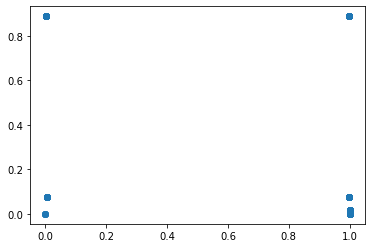

In [28]:
plt.scatter(df.proba_status_given_rm, df.req_meth_proba)
